In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### 1. Baja el archivo caudal_extra.csv. Carga dataset.

In [2]:
data = pd.read_csv('caudal_extra.csv', index_col=0)
data.head()

D:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN


### 2. Analiza el dataset caudal_extra.csv. ¿Qué puedes decir de los datos, distribuciones, missing, u otros? ¿Hay algo que te llame la atención? ¿Por qué hay tantos valores missing? Pensar en la manera en que se elaboró el dataset.

In [3]:
print('Tamaño del dataset: ', data.shape)
print('Columnas:')
data.columns.values.tolist()

Tamaño del dataset:  (1411180, 16)
Columnas:


['codigo_estacion',
 'institucion',
 'fuente',
 'nombre',
 'altura',
 'latitud',
 'longitud',
 'codigo_cuenca',
 'nombre_sub_cuenca',
 'cantidad_observaciones',
 'fecha',
 'caudal',
 'gauge_id',
 'gauge_name',
 'precip_promedio',
 'temp_max_promedio']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411180 entries, 0 to 1411179
Data columns (total 16 columns):
codigo_estacion           1411180 non-null int64
institucion               1411180 non-null object
fuente                    1411180 non-null object
nombre                    1411180 non-null object
altura                    1411180 non-null int64
latitud                   1411180 non-null float64
longitud                  1411180 non-null float64
codigo_cuenca             1411180 non-null int64
nombre_sub_cuenca         1411180 non-null object
cantidad_observaciones    1411180 non-null int64
fecha                     1411180 non-null object
caudal                    1411180 non-null float64
gauge_id                  1411180 non-null int64
gauge_name                1411180 non-null object
precip_promedio           1383413 non-null float64
temp_max_promedio         1259617 non-null float64
dtypes: float64(5), int64(5), object(6)
memory usage: 183.0+ MB


In [5]:
print('Cantidad de filas sin precipitaciones promedio: ',len(data[(data.precip_promedio.isnull()) & (~data.temp_max_promedio.isnull()) ]))
print('Cantidad de filas sin temperatura máxima promedio: ', len(data[(~data.precip_promedio.isnull()) & (data.temp_max_promedio.isnull()) ]))
print('Cantidad de filas sin precipitaciones promedio ni temperatura máxima promedio: ', len(data[(data.precip_promedio.isnull()) & (data.temp_max_promedio.isnull()) ]))


Cantidad de filas sin precipitaciones promedio:  3139
Cantidad de filas sin temperatura máxima promedio:  126935
Cantidad de filas sin precipitaciones promedio ni temperatura máxima promedio:  24628


In [6]:
data.describe()

,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


In [7]:
print('Percentil 99 caudal: ', np.percentile(data.caudal,99))
print('Percentil 99 precipitaciones promedio: ', np.percentile(data.precip_promedio.dropna(),99))
print('Percentil 80 temperatura máxima promedio: ',np.percentile(data.temp_max_promedio.dropna(),80))

Percentil 99 caudal:  1119.0
Percentil 99 precipitaciones promedio:  37.71475006103512
Percentil 80 temperatura máxima promedio:  26.5


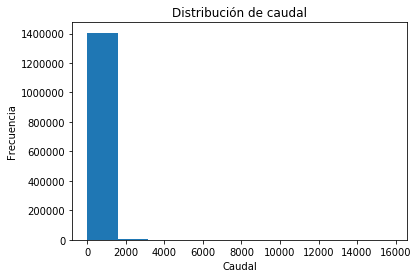

In [8]:
plt.hist(data.caudal)
plt.title('Distribución de caudal')
plt.ylabel('Frecuencia')
plt.xlabel('Caudal');

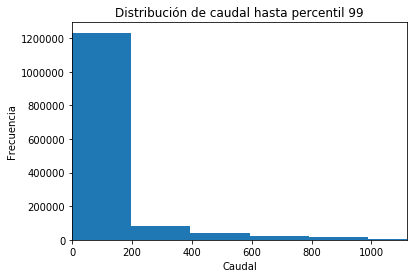

In [9]:
plt.hist(data.caudal, bins = 80)
plt.xlim(0,np.percentile(data.caudal,99))
plt.title('Distribución de caudal hasta percentil 99')
plt.ylabel('Frecuencia')
plt.xlabel('Caudal');

El 99% de los valores de caudal se concentran entre 0 y 1119.

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


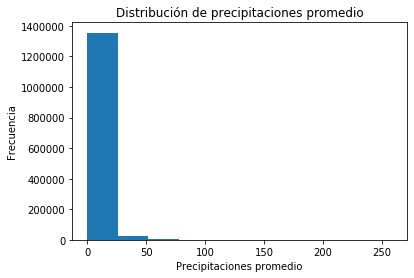

In [10]:
plt.hist(data.precip_promedio)
plt.title('Distribución de precipitaciones promedio')
plt.ylabel('Frecuencia')
plt.xlabel('Precipitaciones promedio');

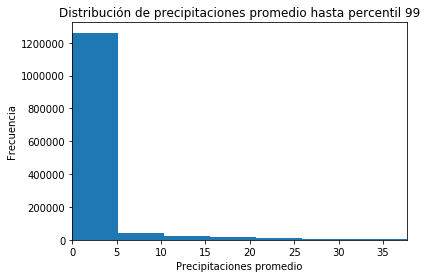

In [11]:
plt.hist(data.precip_promedio.dropna(), bins = 50)
plt.xlim(0,np.percentile(data.precip_promedio.dropna(),99))
plt.title('Distribución de precipitaciones promedio hasta percentil 99')
plt.ylabel('Frecuencia')
plt.xlabel('Precipitaciones promedio');

El 99% de los valores de precipitaciones promedio se concentran entre 0 y 1119.

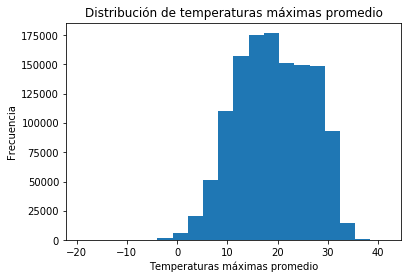

In [12]:
plt.hist(data.temp_max_promedio.dropna(), bins = 20);
plt.title('Distribución de temperaturas máximas promedio')
plt.ylabel('Frecuencia')
plt.xlabel('Temperaturas máximas promedio');

La distribución de las temperaturas máximas promedio presentan una distribución similar a la distribución normal. El percentil 80 se encuentra en los 26.5 grados.

* Cantidad de filas sin precipitaciones promedio:  3139
* Cantidad de filas sin temperatura máxima promedio:  126935
* Cantidad de filas sin precipitaciones promedio ni temperatura máxima promedio:  24628

Llama la atención la gran cantidad de filas que no poseen datos en la columna de precipitaciones promedio ni en temperatura máxima promedio. Esto puede deberse a que en los polígonos de esas cuencas no existen estaciones que midan estas dos variables.

### 3. Plots de precipitación, temperatura y caudal
#### a) Escribir una función que tome como input una estación y haga plot de los datos para una columna.

In [13]:
data = data[(~data.precip_promedio.isnull()) & (~data.temp_max_promedio.isnull())]
print(data.shape)
data['fecha'] = data['fecha'].apply(lambda x: x[:-15])
data['fecha'] = data['fecha'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

(1256478, 16)


In [14]:
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    """Grafica una variable para una estación, en un rango de fechas."""
    datos = data[data.codigo_estacion == codigo_estacion]
    sns.relplot(x = "fecha", y = columna, kind = "line", data = datos)
    f_max = datetime.strptime(fecha_max,'%Y-%m-%d')
    f_min = datetime.strptime(fecha_min,'%Y-%m-%d')
    y_max = datos[(datos['fecha'] > f_min) & (datos['fecha'] < f_max)][columna].max()
    plt.xlim(f_min, f_max)
    plt.ylim(0, y_max+10)
    plt.title('Estación ['+str(codigo_estacion)+']. '+ columna.capitalize()+'.')
    plt.xticks(rotation=45)
    plt.show();

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


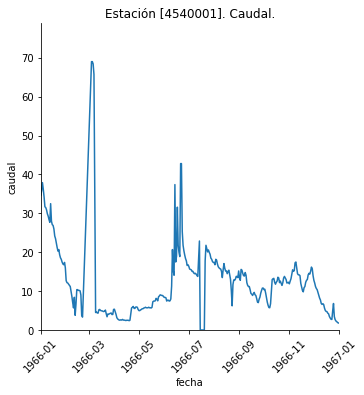

In [15]:
time_plot_una_estacion(4540001, 'caudal', '1966-01-01', '1967-01-01')

#### b. Ahora escribir una función que haga plots de varias columnas, para poder visualizar caudal, precipitación y temperatura al mismo tiempo. Como las series están en diferentes escalas, sugerimos normalizarlas antes de hacer el plot (por ejemplo, dividiendo por la primera observación de cada serie)

In [16]:
data.index = data.fecha

In [17]:
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    """Grafica varias columnas de una estación, en un rango de fecha dado. 
    Normaliza datos dividiendo por el promedio de cada variable"""
    datos = data[data.codigo_estacion == codigo_estacion]
    f_max = datetime.strptime(fecha_max,'%Y-%m-%d')
    f_min = datetime.strptime(fecha_min,'%Y-%m-%d')
    datos = datos[(datos['fecha'] > f_min) & (datos['fecha'] < f_max)]
    
    if len(columnas) == 3:
        p1 = datos[columnas[0]]/datos[columnas[0]].mean()
        p2 = datos[columnas[1]]/datos[columnas[1]].mean()
        p3 = datos[columnas[2]]/datos[columnas[2]].mean()
        p1.plot()
        p2.plot()
        p3.plot()
        plt.legend()
        plt.title('Estación ['+str(codigo_estacion)+']. '+columnas[0].capitalize() +
                  ', '+columnas[1]+' y '+ columnas[2]+'. Normalizado por el promedio.')
        plt.show();
        
    if len(columnas) == 2:
        p1 = datos[columnas[0]]/datos[columnas[0]].mean()
        p2 = datos[columnas[1]]/datos[columnas[1]].mean()
        p1.plot()
        p2.plot()
        plt.legend()
        plt.title('Estación ['+str(codigo_estacion)+']. '+columnas[0].capitalize() +
                  ', '+columnas[1]+'. Normalizado por el promedio.')
        plt.show;
    else:
        print('Debe ingresar 2 o 3 columnas.')

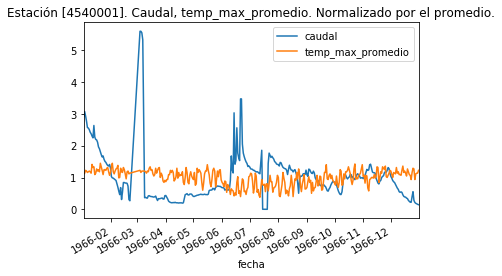

In [18]:
time_plot_estaciones_varias_columnas(4540001, ['caudal','temp_max_promedio'],
                                               '1966-01-01', '1967-01-01')

### 4. Crea tres variables llamadas
* caudal_extremo
* temp_extremo
* precip_extremo

In [23]:
data.index = [i for i in range(len(data))]
#limin_primavera = datetime.strptime('22-09', '%d-%m')
#limax_primavera = datetime.strptime('21-12', '%d-%m')
#limin_verano = datetime.strptime('22-12', '%d-%m')
#limax_verano = datetime.strptime('20-03', '%d-%m')
#limin_otonno = datetime.strptime('21-03', '%d-%m')
#limax_otonno = datetime.strptime('21-06', '%d-%m')
#limin_invierno = datetime.strptime('22-06', '%d-%m')
#limax_invierno = datetime.strptime('21-09', '%d-%m')

index_verano = data[(data['fecha'].dt.month < 3)].index.values.tolist()
index_verano2 = data[(data['fecha'].dt.month == 3) & (data['fecha'].dt.day <= 20)].index.values.tolist()

index_otonno = data[(data['fecha'].dt.month == 3) & (data['fecha'].dt.day > 20)].index.values.tolist()
index_otonno2 = data[(data['fecha'].dt.month > 3) & (data['fecha'].dt.month < 6)].index.values.tolist()
index_otonno3 = data[(data['fecha'].dt.month  == 6) & (data['fecha'].dt.day <= 21)].index.values.tolist()

index_invierno = data[(data['fecha'].dt.month  == 6) & (data['fecha'].dt.day > 21)].index.values.tolist()
index_invierno2 = data[(data['fecha'].dt.month > 6) & (data['fecha'].dt.month < 9)].index.values.tolist()
index_invierno3 = data[(data['fecha'].dt.month  == 9) & (data['fecha'].dt.day <= 21)].index.values.tolist()

index_primavera = data[(data['fecha'].dt.month  == 9) & (data['fecha'].dt.day > 21)].index.values.tolist()
index_primavera2 = data[(data['fecha'].dt.month  > 9) & (data['fecha'].dt.month < 12)].index.values.tolist()
index_primavera3 = data[(data['fecha'].dt.month  == 12) & (data['fecha'].dt.day <= 21)].index.values.tolist()

index_verano3 = data[(data['fecha'].dt.month  == 12) & (data['fecha'].dt.day > 21)].index.values.tolist()

verano = index_verano+index_verano2+index_verano3
otonno = index_otonno+index_otonno2+index_otonno3
invierno = index_invierno+index_invierno2+index_invierno3
primavera = index_primavera+index_primavera2+index_primavera3

In [24]:
data.loc[otonno,'season'] = 'Otoño'
data.loc[invierno,'season'] = 'Invierno'
data.loc[primavera,'season'] = 'Primavera'
data.loc[verano,'season'] = 'Verano'

In [56]:
data_percentil = data.groupby(['codigo_estacion','season'])['caudal','precip_promedio','temp_max_promedio'].quantile(.95)
data_percentil

caudal  precip_promedio  temp_max_promedio
codigo_estacion season                                                  
1020003         Invierno     0.21485         0.000000          13.947500
                Otoño        0.23115         2.100000          14.600000
                Primavera    0.11000         2.332667          16.600000
                Verano       1.74300        10.750000          15.950000
1021001         Invierno     2.55050         0.000000          13.533417
...                              ...              ...                ...
12289002        Verano     166.00000         4.942500          23.490000
12876004        Invierno     9.56900         7.810000           9.491000
                Otoño        4.51650         6.665000          14.465000
                Primavera    8.08000         6.800000          16.859999
                Verano       2.56250         5.555000          19.655001

[529 rows x 3 columns]

In [60]:
data_percentil.loc[(1020003,'Otoño'),'caudal']

0.2311499999999992

In [101]:
data['caudal_extremo'] = 9999
data['temp_extremo'] = 9999
data['precip_extremo'] = 9999
from time import time
t1=time()
for i in data.codigo_estacion.unique():
    for j in data.season.unique():
        for k in ['caudal', 'temp_max_promedio','precip_promedio']:
            try: 
                jk = data[(data.codigo_estacion == i) & (data.season == j)][k] > data_percentil.loc[(i,j),k]
                ind = data[(data.codigo_estacion == i) & (data.season == j)][jk].index
                jl = data[(data.codigo_estacion == i) & (data.season == j)][k] <= data_percentil.loc[(i,j),k]
                inl = data[(data.codigo_estacion == i) & (data.season == j)][jl].index
                
                if k == 'caudal':
                    data.loc[ind,'caudal_extremo'] = 1
                    data.loc[inl,'caudal_extremo'] = 0
                elif k == 'temp_max_promedio':
                    data.loc[ind,'temp_extremo'] = 1
                    data.loc[inl,'temp_extremo'] = 0
                elif k == 'precip_promedio':
                    data.loc[ind,'precip_extremo'] = 1
                    data.loc[inl,'precip_extremo'] = 0
            except:
                pass
    print(i)
t2 = time()
print('Tiempo de ejecución: ',t2-t1) #1061 segundos

4540001
10414001
11040001
6019003
11530000
10311001
10704002
7317003
11536004
8140002
12876004
8381003
5721016
8380006
7379002
8106002
1021001
1020003
8141001
11147001
11143001
11141001
3826001
3820002
3825001
3820003
3820001
4550003
4558001
7116001
11711000
11710000
11337001
11335002
4308001
9402001
4503001
4726001
12289002
12289001
12284007
11315001
11317001
11310001
9437002
3804002
3806001
9116001
7123001
5423003
4320001
1211001
7355001
7359001
7355002
7357002
5704002
11308001
7383001
5410005
5410002
5710001
8394001
5737002
1050004
3431001
8358001
4535002
4537001
2103003
2105005
2105007
2104002
2104003
2105002
2105001
9123001
9129002
11342001
9140001
8334001
8319001
8313001
8312000
8312001
8316002
8317004
8317005
4730001
3450001
3453001
4335001
4513001
2120001
8106001
8307002
8308000
8304001
4716001
4716004
4711001
4714001
3430002
3434003
3430001
4523002
8133001
8135002
8132001
7381001
10364001
5730005
5734001
7335001
7335002
7332001
6035001
6034023
5421001
11542001
11545000
4323001

##### Me parece que esta forma de medir valores "extremos" resulta útil ya que las cuencas entre sí no son comparables (debido a factores geográficos que van a influir directamente en las variables analizadas debido a la localización de cada una) y tomando en cuenta que tampoco se pueden comparar temperaturas de distintas estaciones, debido justamente a que las temperaturas tienen un comportamiento estacional en el año. Sin embargo, me parece que para algunos casos, utilizar el percentil 95 no es el mejor indicador, ya que , por ejemplo, para la cuenca 1020003 en invierno el percentil 95 de las precipitaciones es cero. Tal vez esos casos habría que analizarlos aparte. Además, puede ser que el percentil 95% sea muy alto y esté dejando como "no extremo" valores que sí debiesen considerarse como "extremos". Tal vez un percentil más bajo, como 80% sería mejor, pero de todas formas de debe evaluar con los expertos.

In [106]:
#data[data.temp_extremo == 9999]  #0
#data[data.caudal_extremo == 9999]  #0
#data[data.precip_extremo == 9999]  #0

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_extremo,temp_extremo,precip_extremo


### 5. Analicen la variable caudal_extremo. Los comportamientos en diferentes cuencas son muy diferentes?

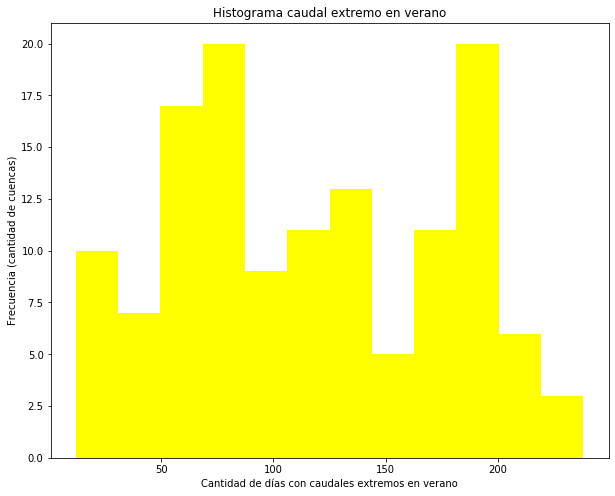

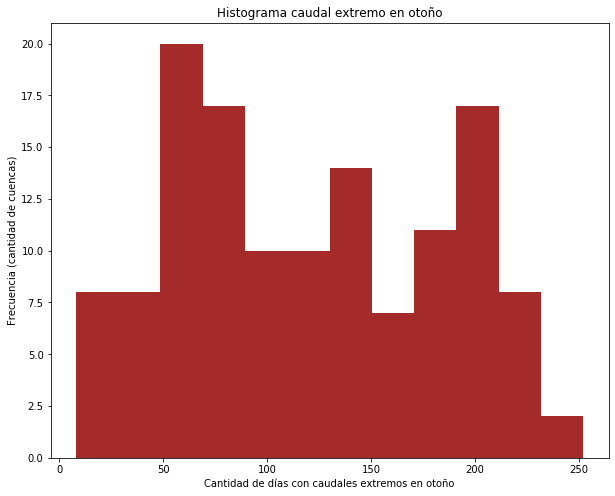

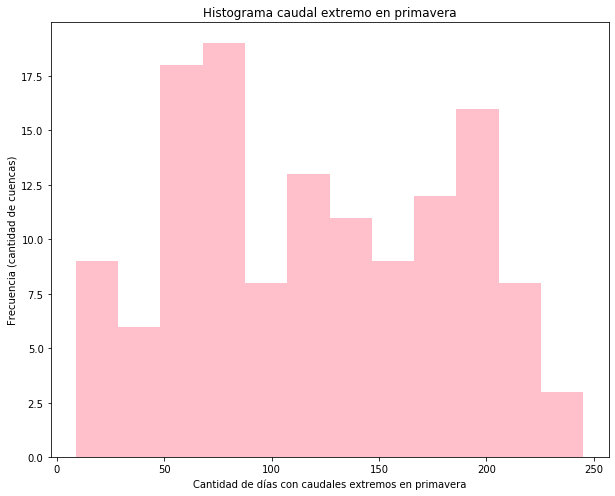

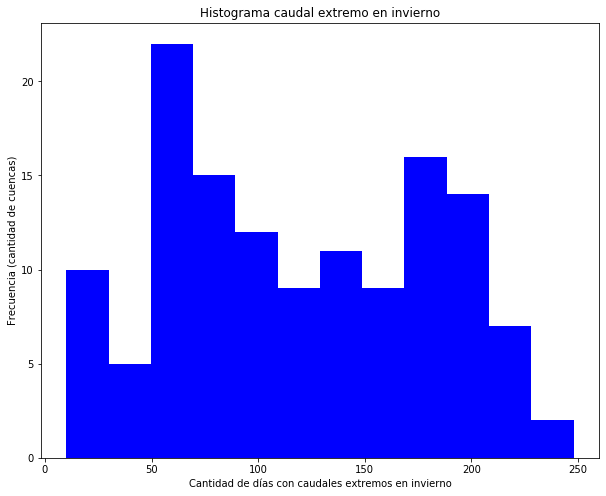

In [167]:
tabla_cext = data.groupby(['codigo_estacion','season','caudal_extremo'])['caudal_extremo'].count().reset_index(name = 'frec')
tabla_cext_1 = tabla_cext[tabla_cext.caudal_extremo == 1]
#separo en seasons
v = tabla_cext_1[tabla_cext_1.season == 'Verano']
o = tabla_cext_1[tabla_cext_1.season == 'Otoño']
i = tabla_cext_1[tabla_cext_1.season == 'Invierno']
p = tabla_cext_1[tabla_cext_1.season == 'Primavera']
# crear histograma
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(v.frec, 12, 
                            facecolor='yellow', label='verano')
plt.title('Histograma caudal extremo en verano')
plt.xlabel('Cantidad de días con caudales extremos en verano')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(o.frec, 12, 
                            facecolor='brown', label='otoño')
plt.title('Histograma caudal extremo en otoño')
plt.xlabel('Cantidad de días con caudales extremos en otoño')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(p.frec, 12, 
                            facecolor='pink', label='primavera')
plt.title('Histograma caudal extremo en primavera')
plt.xlabel('Cantidad de días con caudales extremos en primavera')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(i.frec, 12, 
                            facecolor='blue', label='invinerno')
plt.title('Histograma caudal extremo en invierno')
plt.xlabel('Cantidad de días con caudales extremos en invierno')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

#### En general, la cantidad de días que las cuencas presentan caudales extremos oscila entre 0 y 250 (acumulado en la historia según los datos), en las distintas estaciones, por lo que no todas las cuencas se comportan igual. Por ejemplo, en invierno la mayoría de las cuencas presenta 60 días con caudales extremos, pero también hay cuencas con 20 días o menos de caudales extremos (a lo largo de su historia).
#### También se observa que las distribuciones de cantidad de días con caudales extremos en las 4 estaciones presenta una curva que parece ser bimodal, donde la mayoría de las cuencas tienen alrededor de 60 y al rededor de 190 días con caudal extremo desde que se tiene registro.

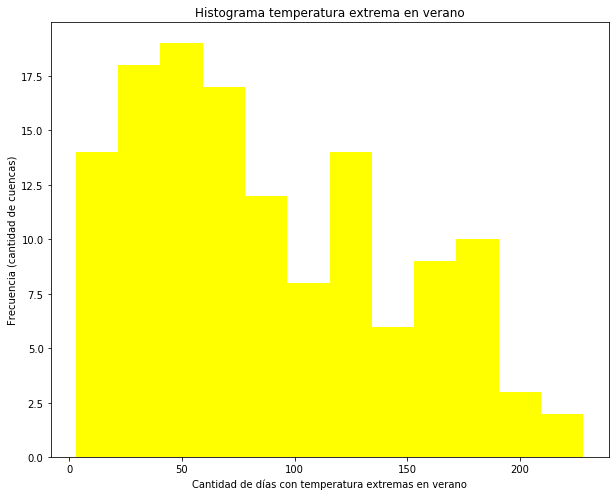

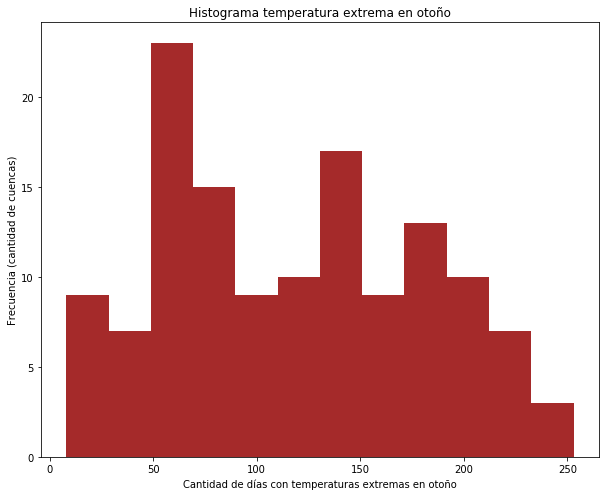

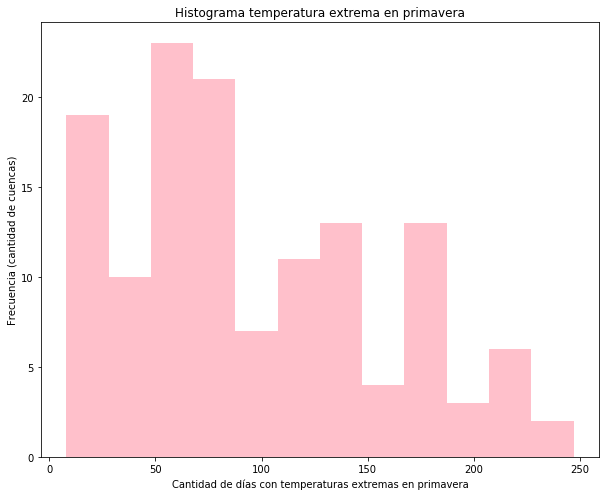

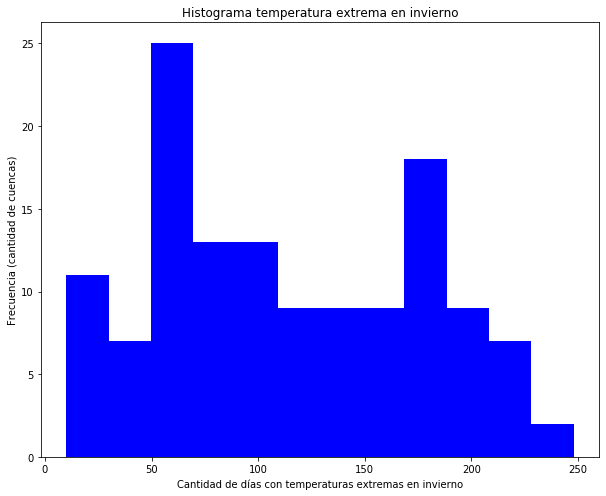

In [173]:
# crear histograma
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(v.frec, 12, 
                            facecolor='yellow', label='verano')
plt.title('Histograma temperatura extrema en verano')
plt.xlabel('Cantidad de días con temperatura extremas en verano')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(o.frec, 12, 
                            facecolor='brown', label='otoño')
plt.title('Histograma temperatura extrema en otoño')
plt.xlabel('Cantidad de días con temperaturas extremas en otoño')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(p.frec, 12, 
                            facecolor='pink', label='primavera')
plt.title('Histograma temperatura extrema en primavera')
plt.xlabel('Cantidad de días con temperaturas extremas en primavera')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(i.frec, 12, 
                            facecolor='blue', label='invinerno')
plt.title('Histograma temperatura extrema en invierno')
plt.xlabel('Cantidad de días con temperaturas extremas en invierno')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

#### Se observa que en verano, la mayoría de las cuencas presentan al rededor de 175 días de temperaturas extremas en esa estación (a lo largo de la historia). Existe diferencia entre las cuencas en cuanto a las temperaturas extremas que acumulan, donde algunas cuencas presentan 25 días acumulados con temperaturas extremas, mientras que otras presentan 170, para una misma estación.

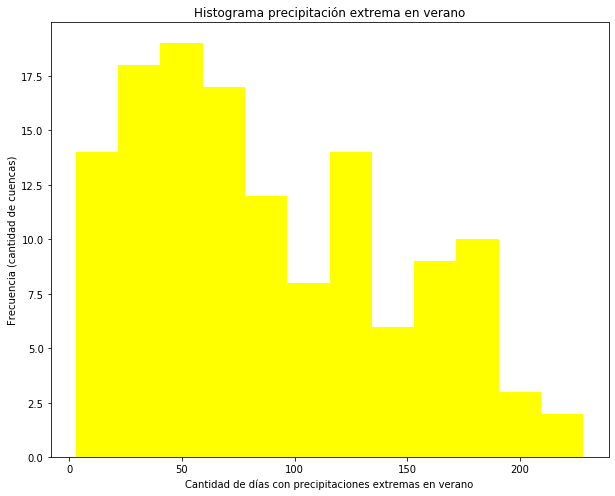

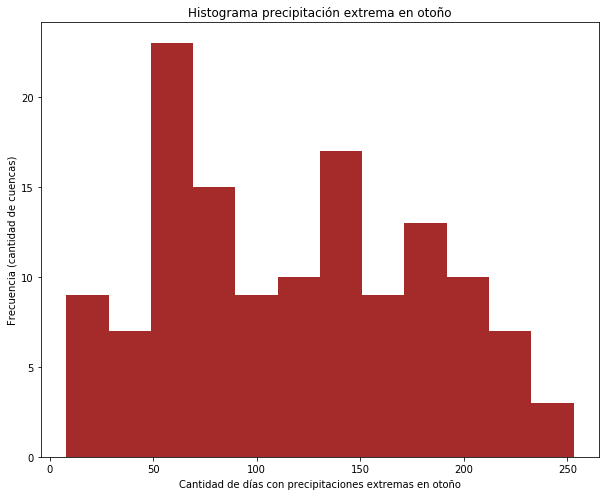

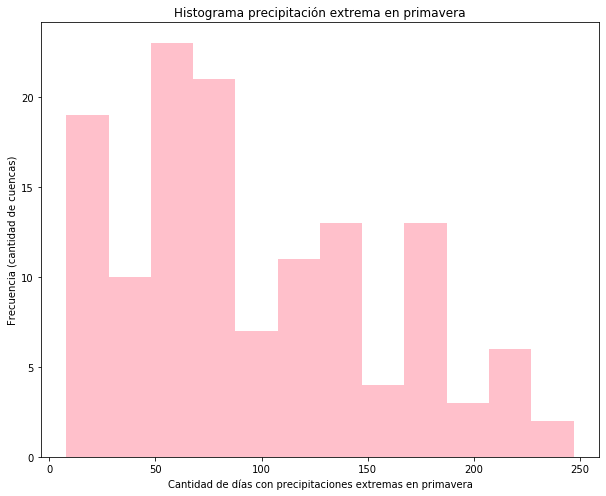

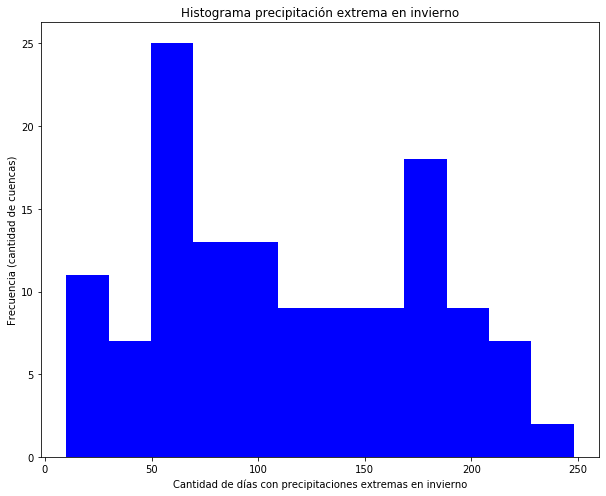

In [174]:
# crear histograma
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(v.frec, 12, 
                            facecolor='yellow', label='verano')
plt.title('Histograma precipitación extrema en verano')
plt.xlabel('Cantidad de días con precipitaciones extremas en verano')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(o.frec, 12, 
                            facecolor='brown', label='otoño')
plt.title('Histograma precipitación extrema en otoño')
plt.xlabel('Cantidad de días con precipitaciones extremas en otoño')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(p.frec, 12, 
                            facecolor='pink', label='primavera')
plt.title('Histograma precipitación extrema en primavera')
plt.xlabel('Cantidad de días con precipitaciones extremas en primavera')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(i.frec, 12, 
                            facecolor='blue', label='invinerno')
plt.title('Histograma precipitación extrema en invierno')
plt.xlabel('Cantidad de días con precipitaciones extremas en invierno')
plt.ylabel('Frecuencia (cantidad de cuencas)')
plt.show();

#### Al igual que en las variables anteriores,con las precipitaciones extremas también existen cuencas que acumulan 50 días con precipitaciones extremas, mientras que otras acumulan más del triple. No obstante, además de la diferencia entre cuencas, aquí se puede apreciar también una diferencia marcada entre las distribuciones de cantidad de días con precipitación extrema y la estación (especialmente ne verano, donde se aprecia que la cantidad de días en promedio es menor).

### 6. Hagan un plot del porcentaje de eventos extremos a través del tiempo (caudal_extremo, temp_extremo, precip_extremo). Se han vuelto más o menos comunes?

In [199]:
data_ext_0 = data[data.caudal_extremo == 0]
data_ext_0_frec = data_caudal_0.groupby(['fecha', 'caudal_extremo'])['caudal_extremo'].count().reset_index(name = 'frec_0')
data_ext_1 = data[data.caudal_extremo == 1]
data_ext_1_frec = data_ext_1.groupby(['fecha', 'caudal_extremo'])['caudal_extremo'].count().reset_index(name = 'frec_1')
d_extremo = data_ext_0_frec.merge(data_ext_1_frec, on = 'fecha', how = 'left')
d_extremo = dcaudal_extremo[~d_extremo.frec_1.isnull()]
d_extremo['ratio'] = round((d_extremo.frec_1)/(d_extremo.frec_0+d_extremo.frec_0)*100,2)
d_extremo

,fecha,caudal_extremo_x,frec_0,caudal_extremo_y,frec_1,ratio
824,1962-06-25,0,4,1.0,2.0,25.00
825,1962-06-26,0,4,1.0,2.0,25.00
826,1962-06-27,0,3,1.0,4.0,66.67
827,1962-06-28,0,4,1.0,3.0,37.50
828,1962-06-29,0,5,1.0,2.0,20.00
...,...,...,...,...,...,...
21166,2018-03-05,0,48,1.0,1.0,1.04
21167,2018-03-06,0,48,1.0,1.0,1.04
21168,2018-03-07,0,47,1.0,2.0,2.13
21169,2018-03-08,0,47,1.0,1.0,1.06


In [248]:
def time_plot_una_vextrema(columna, fecha_min, fecha_max):
    """Grafica el porcentaje de variables extremas en un rango de fechas."""
    data_ext_0 = data[data[columna] == 0]
    data_ext_0_frec = data_ext_0.groupby(['fecha', columna])[columna].count().reset_index(name = 'frec_0')
    data_ext_1 = data[data[columna] == 1]
    data_ext_1_frec = data_ext_1.groupby(['fecha', columna])[columna].count().reset_index(name = 'frec_1')
    d_extremo = data_ext_0_frec.merge(data_ext_1_frec, on = 'fecha', how = 'left')
    d_extremo = d_extremo[~d_extremo.frec_1.isnull()]
    d_extremo['ratio'] = round((d_extremo.frec_1)/(d_extremo.frec_0+d_extremo.frec_0)*100,2)
    datos = d_extremo
    sns.relplot(x = "fecha", y = 'ratio', kind = "line", data = datos)
    f_max = datetime.strptime(fecha_max,'%Y-%m-%d')
    f_min = datetime.strptime(fecha_min,'%Y-%m-%d')
    y_max = datos[(datos['fecha'] > f_min) & (datos['fecha'] < f_max)]['ratio'].max()
    plt.xlim(f_min, f_max)
    plt.ylim(0, y_max+10)
    plt.title('Proporción de eventos de '+columna.capitalize()+' en el tiempo.')
    plt.xticks(rotation=45)
    plt.show();

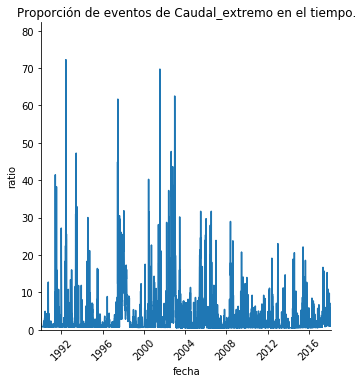

In [249]:
time_plot_una_vextrema('caudal_extremo','1990-01-01','2018-03-09')

#### Se observa que el % (ratio) de casos caudal_extremo sobre casos totales ha ido en disminución con el tiempo.

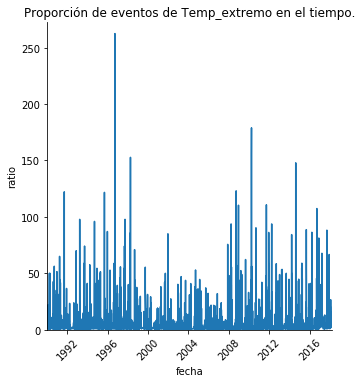

In [252]:
time_plot_una_vextrema('temp_extremo','1990-01-01','2018-03-09')

#### Se observa que el % (ratio) de casos temperaruta extrema sobre casos totales se ha mantenido en el tiempo, aunque presenta una tendencia al alza en los últimos 20 años.

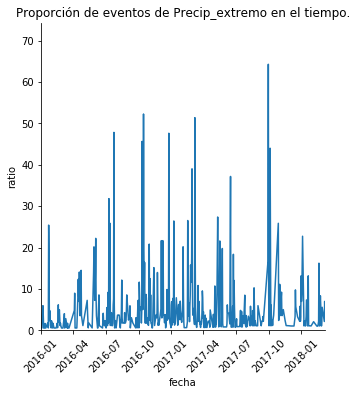

In [258]:
time_plot_una_vextrema('precip_extremo','2016-01-01','2018-03-09')

#### Se observa que el % (ratio) de casos precipitación extrema sobre casos totales se ha mantenido en el tiempo, aunque el valor del ratio peak ha ido en aumento.

### 7. Modelo

In [260]:
data.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,season,caudal_extremo,temp_extremo,precip_extremo
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1965-08-19,77.0,4540001,Rio Grande En Paloma 1,0.0,21.5,Invierno,1,0,0
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1965-09-05,51.2,4540001,Rio Grande En Paloma 1,0.0,20.5,Invierno,1,0,0
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1965-10-06,56.9,4540001,Rio Grande En Paloma 1,0.0,22.0,Primavera,0,0,0
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1965-10-15,81.9,4540001,Rio Grande En Paloma 1,0.0,20.5,Primavera,1,0,0
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1965-12-21,50.4,4540001,Rio Grande En Paloma 1,0.0,28.5,Primavera,0,0,0


In [282]:
data.shape

(1256478, 20)

In [292]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

X = data[['altura','cantidad_observaciones', 'caudal', 'precip_promedio','temp_max_promedio',
        'temp_extremo','precip_extremo']]
Y = data['caudal_extremo']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3312)

In [293]:
data.groupby('caudal_extremo')['caudal_extremo'].count().reset_index(name = 'frec')

,caudal_extremo,frec
0,0,1193867
1,1,62611


In [315]:
bbc = RandomForestClassifier(random_state = 3312, class_weight = 'balanced')
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


* Se uilizará el 70% del dataset para entrenamiento y el 30% para testing.
#### Dado que el dataset se encuentra desbalanceado, pueslos datos de caudal extremo sólo constituyen el 5,2% de los casos totales, se utilizará el algoritmo de Random Forest Classifier, pero asignando el valor de "balanced" al parámetro class_weight, lo que permite ponderar el peso de las clases en el set de entrenamiento. El algoritmo realiza varios submuestreos donde se seleccionan disintos árboles de decisión, cuyos resultados se promedian (similar a una votación por árbol, acerca de si el caudal será o no extremo) .

#### Consideraciones relevantes:
* El modelo sólo recibe registros completos, vale decir, así como está sólo serviría para las cuencas que tengan estaciones de temperatura y de precipitación en su polígono.
* No utilizaría datos del mismo día, dado que la performance del modelo es alta y probablemente conseguir los datos del día retrase la operación. Utilizaría como input el promedio de los últimos tres días para predecir el día siguiente.
* En el caso de querer predecir más de un día, consideraría realizar una predicción de las variables input y luego, esas predicciones, utilizarlas como datos de entrada para el modelo (y transparentando el riesgo de basarse en un pronóstico para una predicción).

### 8. Análisis de resultados

In [316]:
#Validación Cruzada
score_accuracy = cross_val_score(bbc, X_test, y_test, scoring = 'accuracy', cv=10, n_jobs=-1)
score_recall = cross_val_score(bbc, X_test, y_test, scoring = 'recall', cv=10, n_jobs=-1)
score_precision = cross_val_score(bbc, X_test, y_test, scoring = 'precision', cv=10, n_jobs=-1)

Se realizan 10 extracciones diferentes del conjunto de test para valudar la solución.

In [317]:
score_accuracy, score_recall, score_precision

(array([0.97002255, 0.97031437, 0.96890834, 0.970898  , 0.97137551,
        0.97015519, 0.96972993, 0.97169311, 0.97124134, 0.97227602]),
 array([0.52192513, 0.52352941, 0.49144385, 0.52192513, 0.53208556,
        0.52245989, 0.49973248, 0.52969502, 0.52059925, 0.53986089]),
 array([0.80528053, 0.81110191, 0.80614035, 0.82782019, 0.82985822,
        0.80810587, 0.81929825, 0.84040747, 0.83807063, 0.84505863]))

Se calcula el promedio de las métricas de desempeño del modelo.

In [319]:
print('Accuracy del modelo: ', score_accuracy.mean())
print('Recall del modelo: ', score_recall.mean())
print('Precision del modelo: ', score_precision.mean())

Accuracy del modelo:  0.9706614364180026
Recall del modelo:  0.5203256624406657
Precision del modelo:  0.8231142030017706


* Accuracy cercano a 1: indica que es bueno, aunque por lo general cuando son clases desbalanceadas es natural que de un accuracy alto debido a que si el modelo redice siempre cero, es muy probable que acierte gran parte de las veces.
* Precisión: También suele ser alta (cercana a 1), dado que la cantidad de falsos positivos tiende a ser baja en dataset desbalanceados (no se tiende a predecir con 1 algo que es 0, más bien tiende a predecirse todo como 0).
* Recall: es más difícil de conseguir un alto recall en muestras desbalanceadas, debido a que los falsos negativos aumentan y por ello el recall disminuye (tiende a predecirse los 1 como 0). En este caso da un valor de 0,52.
* Para lograr una mejor performance del modelo, se puede utilizar GridSearchCV de scikitlearn, para poder escoger los parámetros de entrenamiento del Random Forest.

[[355933   2315]
 [  7603  11093]]


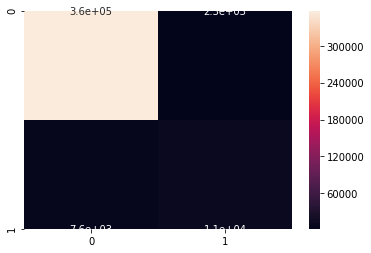

In [326]:
# Matriz de confusión
pd.options.display.float_format = '{:.2f}'.format
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True);